<a href="https://colab.research.google.com/github/fikisug/PCVK/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Mengubah tingkat kecerahan citra
--------------------------------
Masukkan nilai kecerahan: 50


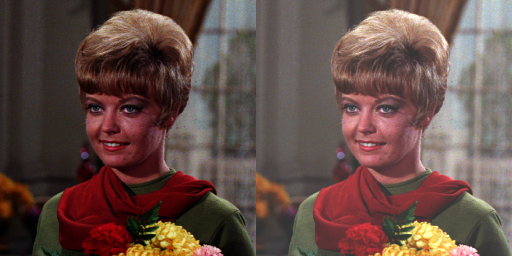

In [3]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

print('Mengubah tingkat kecerahan citra')
print('--------------------------------')
try:
  brighness = float(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff')
brighness_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brighness_image[y,x,c] = np.clip(original[y,x,c] + brighness, 0, 255)

#cara simpel tanpa for loop
# brighness_image = cv.convertScaleAbs(original, brighness)

final_frame = cv.hconcat((original, brighness_image))

cv2_imshow(final_frame)

Mengubah inverse citra
--------------------------------


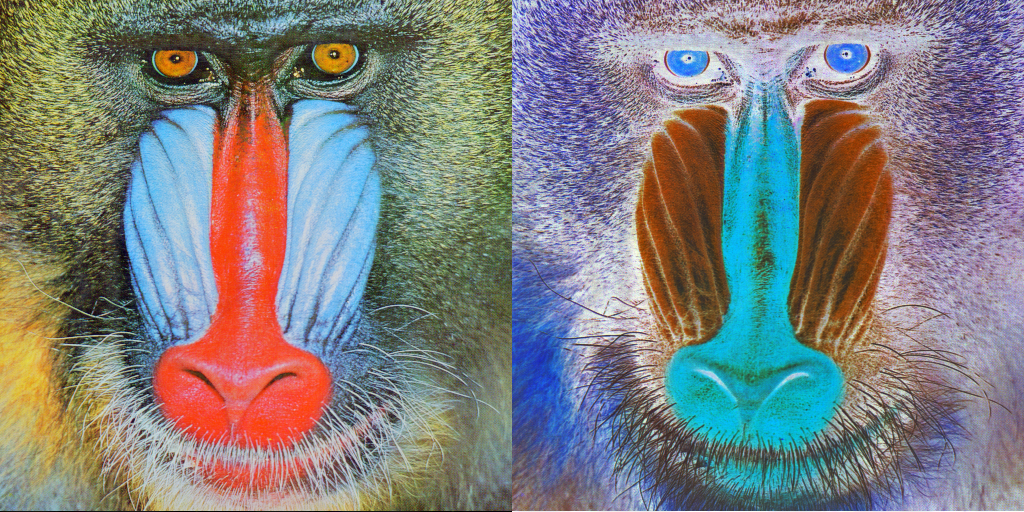

In [16]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

print('Mengubah inverse citra')
print('--------------------------------')
# try:
#   brighness = float(input('Masukkan nilai kecerahan: '))
# except ValueError:
#   print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/Images/mandrill.tiff')
negative_image = 255 - original

final_frame = cv.hconcat((original, negative_image))

cv2_imshow(final_frame)

Mengubah tingkat kecerahan citra
--------------------------------
Masukkan nilai kecerahan [-255 - 255] : 50
Masukkan nilai kontras [1 - 3] : 2


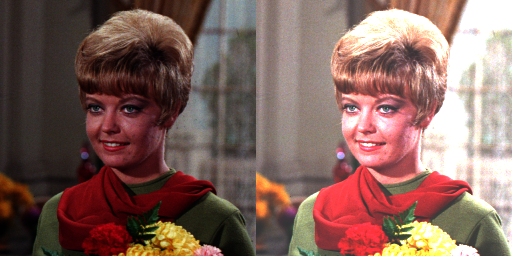

In [4]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

print('Mengubah tingkat kecerahan citra')
print('--------------------------------')
try:
  brighness = float(input('Masukkan nilai kecerahan [-255 - 255] : '))
  contras = float(input('Masukkan nilai kontras [1 - 3] : '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff')
brighness_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brighness_image[y,x,c] = np.clip(contras * original[y,x,c] + brighness, 0, 255)

#cara simpel tanpa for loop
# brighness_image = cv.convertScaleAbs(original, brighness)

final_frame = cv.hconcat((original, brighness_image))

cv2_imshow(final_frame)

Mengubah tingkat kecerahan dengan Tranformasi Log
Masukkan nilai kecerahan : 50


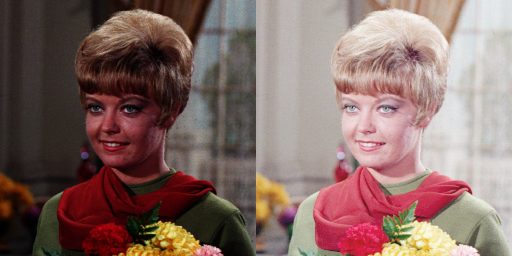

In [35]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
import math

def log_transform(c, r):
    # Menghitung transformasi logaritmik
    s = c * np.log(1 + r)
    return s

# Membaca citra asli
original = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff')

# Input nilai kecerahan dari pengguna
print('Mengubah tingkat kecerahan dengan Tranformasi Log')
try:
    kecerahan = float(input('Masukkan nilai kecerahan : '))
except ValueError:
    print('Error, not a number')

# Menentukan konstanta c berdasarkan nilai kecerahan yang dimasukkan pengguna
c = 255 / np.log(1 + kecerahan)

# Menerapkan transformasi Logarithmic Brightness pada setiap piksel citra
brightness_image = np.zeros_like(original, dtype=np.float32)
for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        brightness_image[y, x] = log_transform(c, original[y, x])

# Normalisasi citra hasil ke dalam rentang [0, 255]
brightness_image = (brightness_image / np.max(brightness_image)) * 255

# Konversi ke tipe data uint8
brightness_image = brightness_image.astype(np.uint8)

# Menampilkan citra asli dan hasil transformasi
final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)


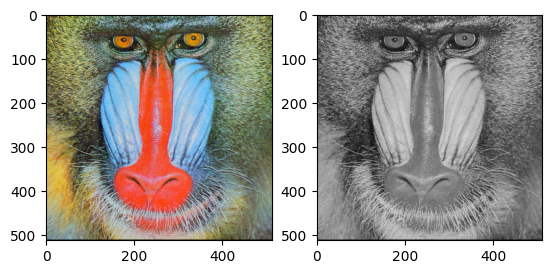

In [67]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

# Membaca citra asli
original = cv.imread('/content/drive/MyDrive/PCVK/Images/mandrill.tiff')

gray_image = np.zeros(original.shape, original.dtype)

# Konversi citra berwarna ke citra grayscale menggunakan metode averaging
for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        # Menghitung rata-rata intensitas warna pada setiap piksel
        gray_value = np.sum(original[y, x],axis=-1,keepdims=1)/3

        # Menetapkan nilai grayscale pada piksel yang sesuai
        gray_image[y, x] = int(gray_value)

# Menampilkan citra asli dan hasil transformasi
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(original,cv.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
plt.imshow(gray_image)


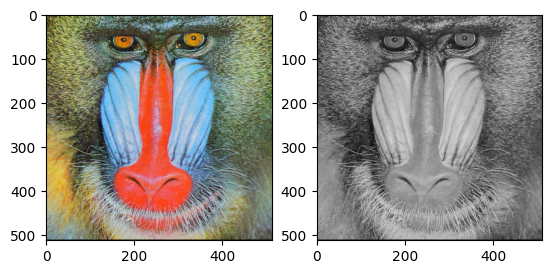

In [69]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

# Membaca citra asli
original = cv.imread('/content/drive/MyDrive/PCVK/Images/mandrill.tiff')

gray_image_lightness = np.zeros(original.shape, original.dtype)

# Konversi citra berwarna ke citra grayscale menggunakan metode Lightness
for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        # Menghitung nilai Lightness
        lightness_value = np.max(original[y, x],axis=-1,keepdims=1)/2 + np.min(original[y, x],axis=-1,keepdims=1)/2

        # Menetapkan nilai grayscale pada piksel yang sesuai
        gray_image_lightness[y, x] = int(lightness_value)

plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(original, cv.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
plt.imshow(gray_image_lightness)

plt.show()


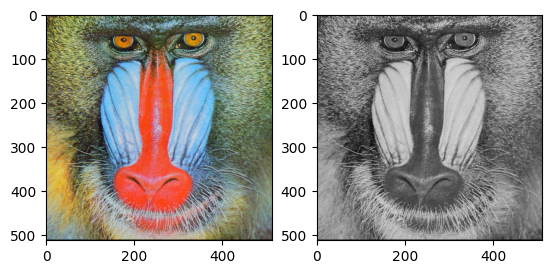

In [80]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

# Membaca citra asli
original = cv.imread('/content/drive/MyDrive/PCVK/Images/mandrill.tiff')

gray_lumin = np.zeros(original.shape, original.dtype)

luminosity_constant = [0.21,0.72,0.07]

# Konversi citra berwarna ke citra grayscale menggunakan metode Lightness
for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        # Menghitung nilai Lightness
        lumin_value = np.dot(original[y, x], luminosity_constant).astype(np.uint8)

        # Menetapkan nilai grayscale pada piksel yang sesuai
        gray_lumin[y, x] = int(lumin_value)

plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(original, cv.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
plt.imshow(gray_lumin)

plt.show()


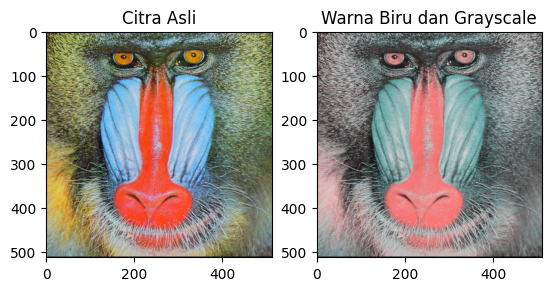

In [114]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

# Membaca citra asli
original = cv.imread('/content/drive/MyDrive/PCVK/Images/mandrill.tiff')

# Inisialisasi citra hasil
result_image = np.copy(original)

# Ambil saluran biru dari citra asli
blue_channel = original[:, :, 0]

# Inisialisasi citra grayscale untuk bagian selain warna biru
gray_image = cv.cvtColor(original, cv.COLOR_BGR2GRAY)

# Ambil mask untuk area yang bukan warna biru
non_blue_mask = (original[:, :, 0] != original[:, :, 2]) | (original[:, :, 0] != original[:, :, 1])

# Salin nilai grayscale dari citra asli ke citra hasil pada saluran merah dan hijau
result_image[:, :, 0] = gray_image
result_image[:, :, 1] = gray_image

# Menampilkan citra asli dan citra hasil transformasi
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(original, cv.COLOR_BGR2RGB))
plt.title('Citra Asli')

plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(result_image, cv.COLOR_BGR2RGB))
plt.title('Warna Biru dan Grayscale')

plt.show()
